# Medical Insurance Cost Predictioncompanies?

## About Dataset

## Dataset Overview: 
The medical insurance dataset encompasses various factors influencing medical expenses, such as age, sex, BMI, smoking status, number of children, and region. This dataset serves as a foundation for training machine learning models capable of forecasting medical expenses for new policyholders.

Its purpose is to shed light on the pivotal elements contributing to increased insurance costs, aiding the company in making more informed decisions concerning pricing and risk assessment.

The dataset comprises 2.7K rows and 7 columns, including:

Age Sex BMI (Body Mass Index) Children Smoker Region Charges Problem Statement:

What are the primary factors influencing medical expenses? How accurate are machine learning models in predicting medical expenses? In what ways can machine learning models enhance the efficiency and profitability of health insurance companies?

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Dataset

In [2]:
data=pd.read_csv("D:\medical_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## Distribution of categorical variables

In [5]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    print("Distribution of", feature)
    print(data[feature].value_counts())
    print("\n")

Distribution of sex
sex
male      1406
female    1366
Name: count, dtype: int64


Distribution of smoker
smoker
no     2208
yes     564
Name: count, dtype: int64


Distribution of region
region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64




## Distribution of charges

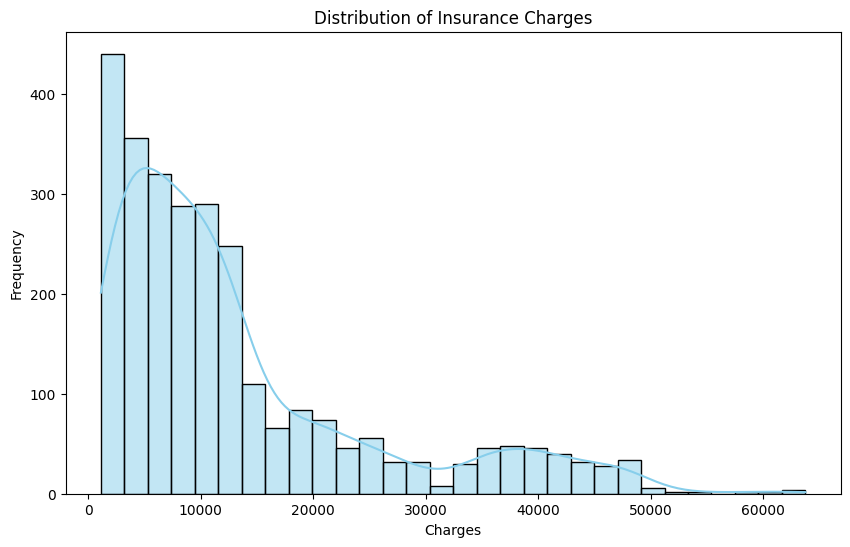

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## Pairplot to visualize relationships between numerical features

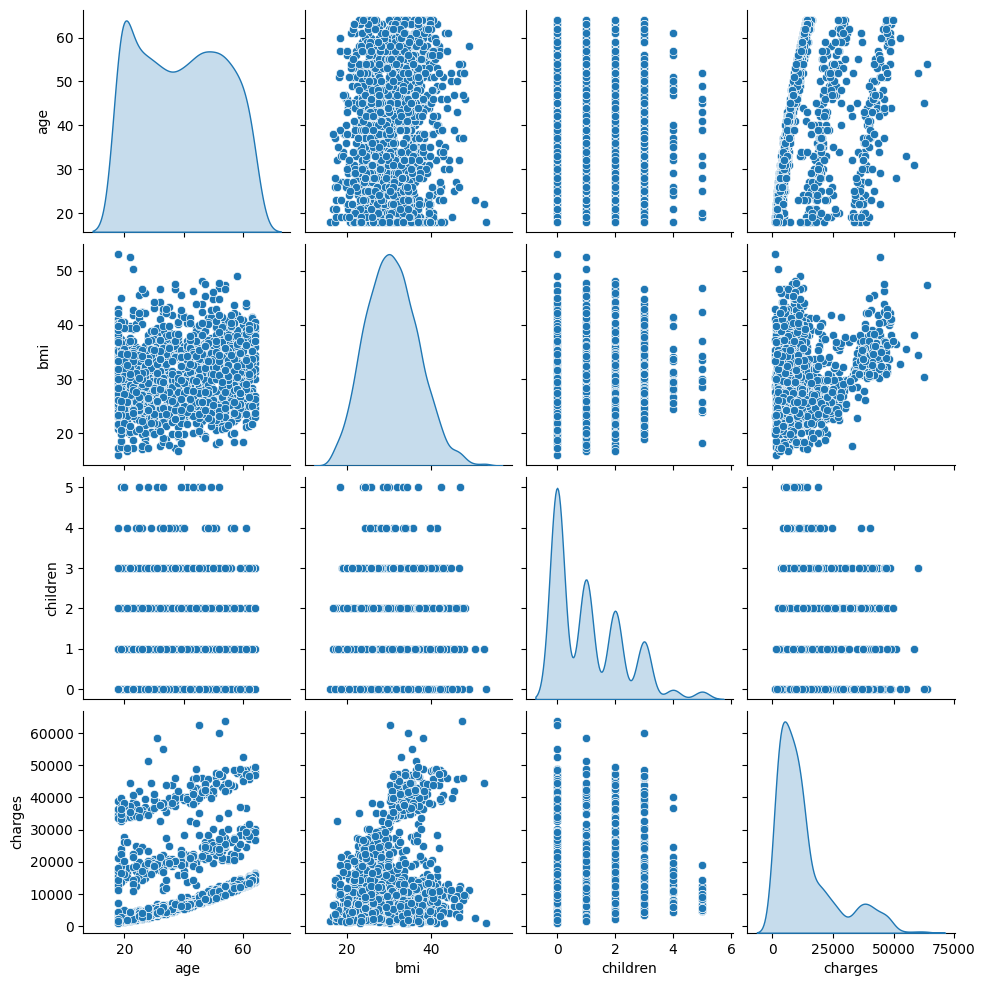

In [7]:
sns.pairplot(data, diag_kind='kde')
plt.show()

## Boxplot to visualize charges by region

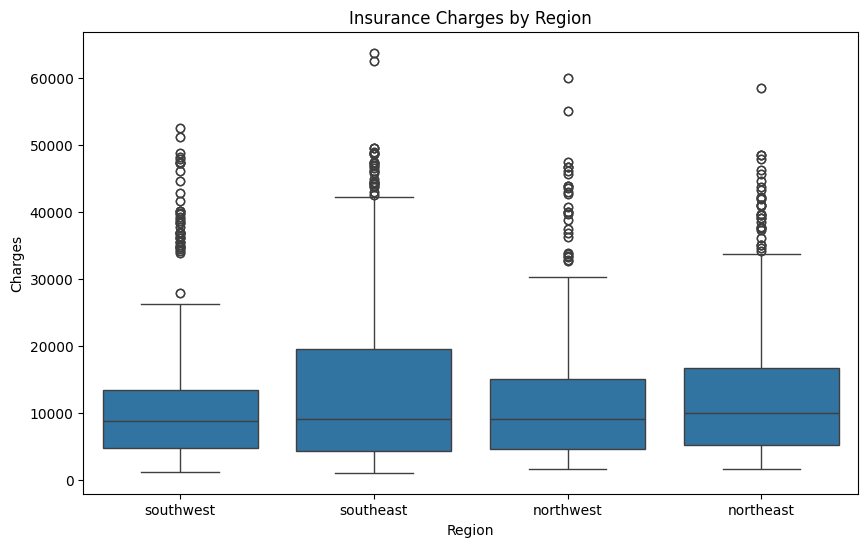

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

## Boxplot to visualize charges by region

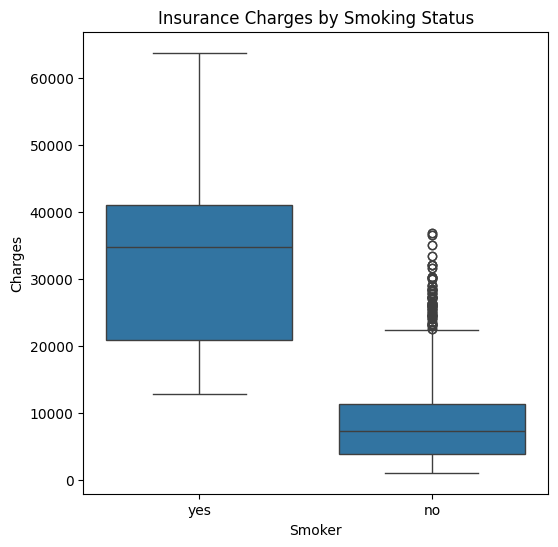

In [9]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

## Encode categorical values "sex" ,"smoker" and "region" to numerical values and make this change as permanent

In [10]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original DataFrame to preserve the original data
data_encoded = data.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex', 'Smoker', and 'Region' columns
data_encoded['sex'] = label_encoder.fit_transform(data['sex'])
data_encoded['smoker'] = label_encoder.fit_transform(data['smoker'])
data_encoded['region'] = label_encoder.fit_transform(data['region'])

# Display the first few rows of the encoded DataFrame
print("Encoded DataFrame:")
print(data_encoded.head())
print("\n")

# Now the changes are permanent in the 'data_encoded' DataFrame

# If you want to make the changes permanent in the original DataFrame 'data', you can do:
data[['sex', 'smoker', 'region']] = data_encoded[['sex', 'smoker', 'region']]

# Now the changes are permanent in the original DataFrame 'data'

Encoded DataFrame:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520




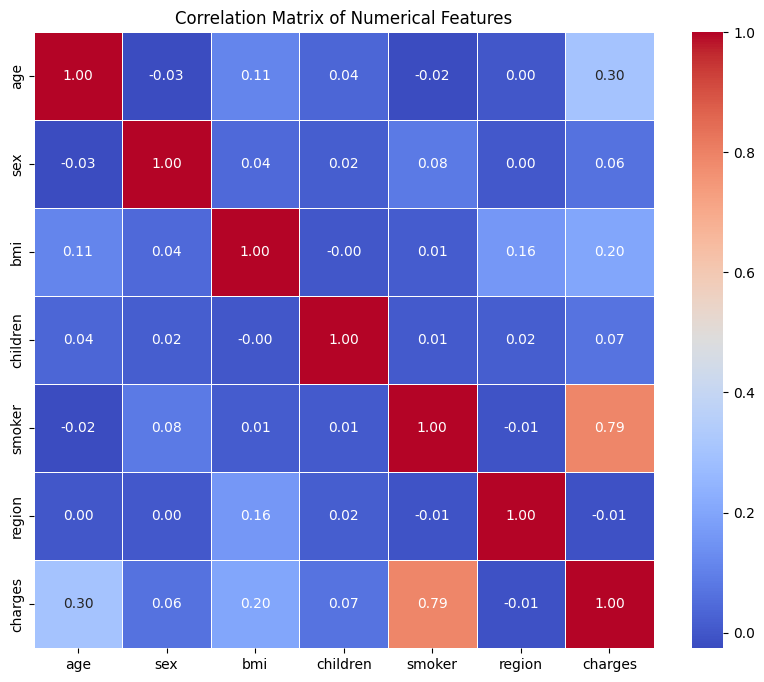

In [11]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [12]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.507215,30.701349,1.101732,0.203463,1.532468,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.103467,12151.768945
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4687.797000
50%,39.000000,1.000000,30.447500,1.000000,0.000000,2.000000,9333.014350
75%,51.000000,1.000000,34.770000,2.000000,0.000000,2.000000,16577.779500
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## Build a Linear regression to create predictive models

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Mean Squared Error (MSE): 39922479.35
R-squared (R2): 0.74


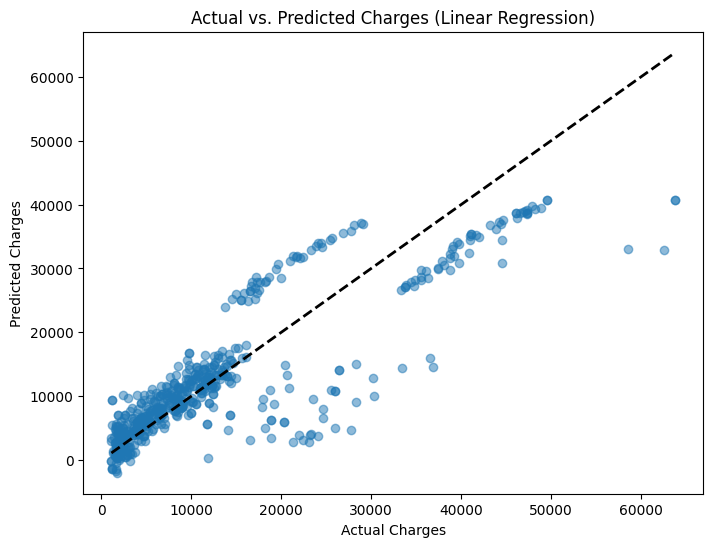

In [14]:
# Separate features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Linear Regression)")
plt.show()

## Decision Tree

Mean Squared Error (MSE): 21791960.38
R-squared (R2): 0.86


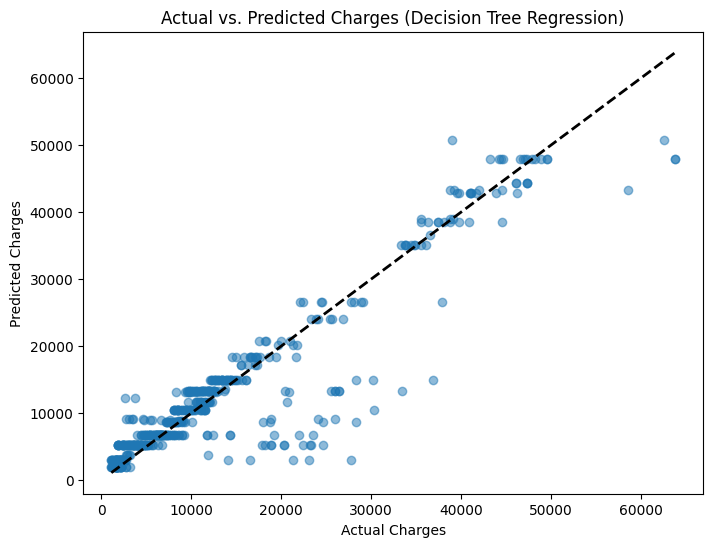

In [15]:
# Assuming you have a pandas DataFrame named "df" containing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your preprocessed dataset
# df = pd.read_csv('your_preprocessed_dataset.csv')

# Separate features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor model
model = DecisionTreeRegressor(max_depth=5)  # You can adjust the max_depth as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Decision Tree Regression)")
plt.show()

## Support vector regression

Mean Squared Error (MSE): 138327202.82
R-squared (R2): 0.10


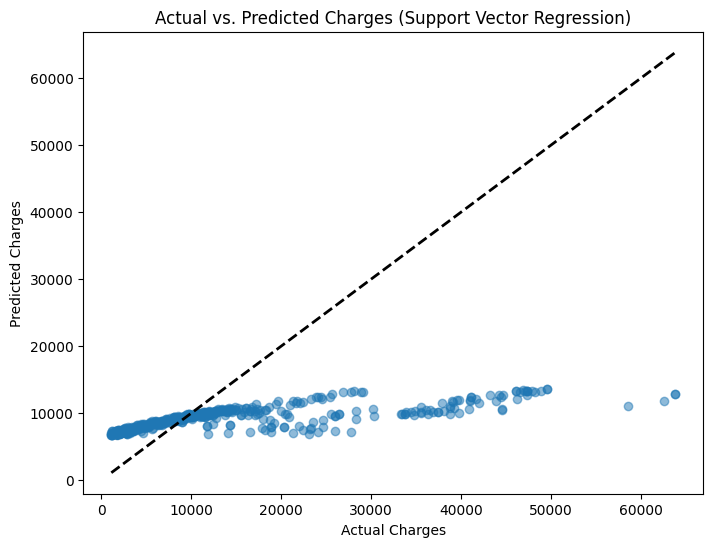

In [16]:
# Assuming you have a pandas DataFrame named "df" containing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load your preprocessed dataset
# df = pd.read_csv('your_preprocessed_dataset.csv')

# Separate features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
model = SVR(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter as needed

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Support Vector Regression)")
plt.show()

## Gradient Boosting

Mean Squared Error (MSE): 18843332.95
R-squared (R2): 0.88


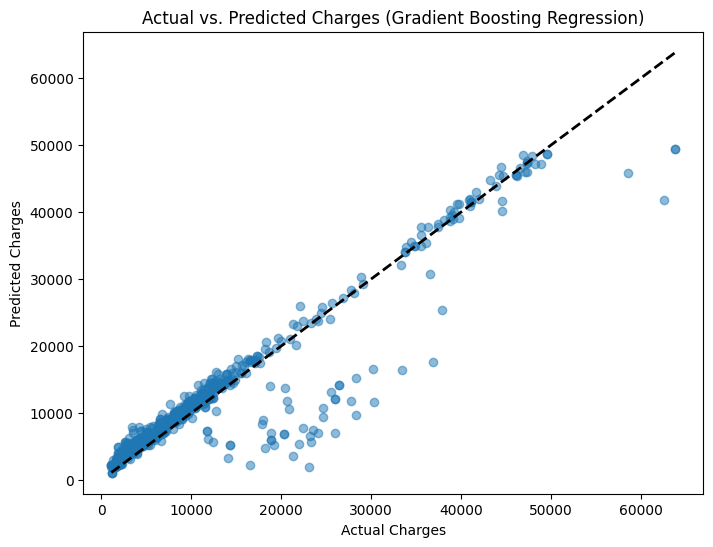

In [17]:
# Assuming you have a pandas DataFrame named "df" containing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your preprocessed dataset
# df = pd.read_csv('your_preprocessed_dataset.csv')

# Separate features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
# You can adjust the hyperparameters (n_estimators, learning_rate, max_depth) as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Gradient Boosting Regression)")
plt.show()

## KNeighborsRegressor

Mean Squared Error (K-Nearest Neighbors): 91390154.71439797


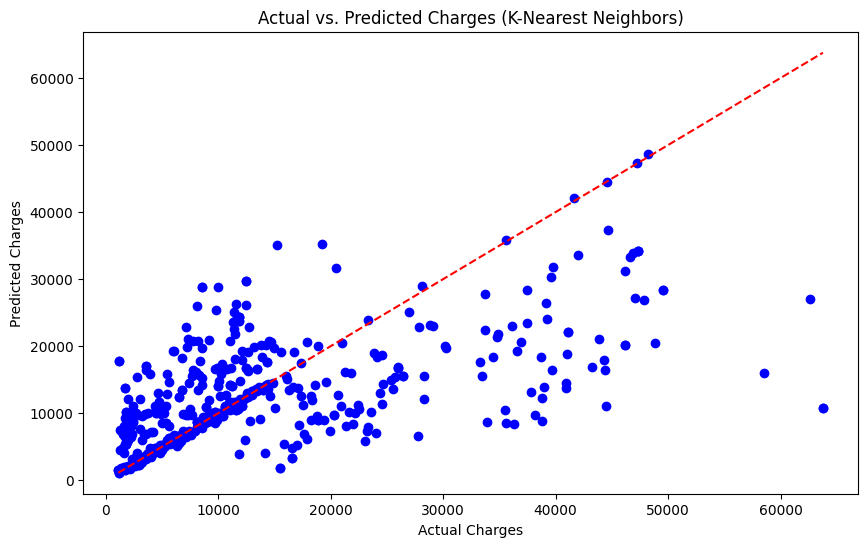

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Compute the Mean Squared Error (MSE) of the K-Nearest Neighbors Regressor model
knn_mse = mean_squared_error(y_test, knn_predictions)
print("Mean Squared Error (K-Nearest Neighbors):", knn_mse)

# Plot actual vs. predicted charges for K-Nearest Neighbors Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (K-Nearest Neighbors)')
plt.show()

## Neural Networks

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error (MLP): 130371357.10812001


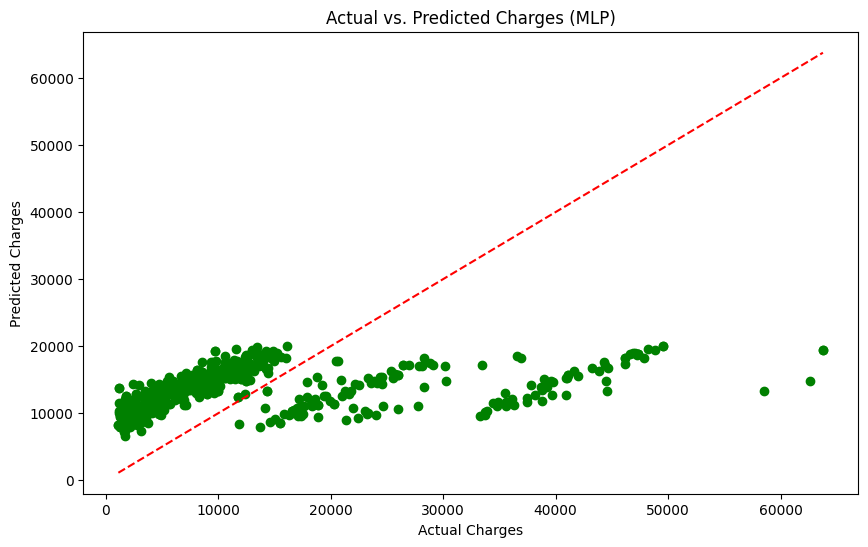

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Multi-layer Perceptron Regressor model
mlp_model = MLPRegressor(random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
mlp_predictions = mlp_model.predict(X_test)

# Compute the Mean Squared Error (MSE) of the Multi-layer Perceptron Regressor model
mlp_mse = mean_squared_error(y_test, mlp_predictions)
print("Mean Squared Error (MLP):", mlp_mse)

# Plot actual vs. predicted charges for Multi-layer Perceptron Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, mlp_predictions, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (MLP)')
plt.show()

## Conclusion

1. **Primary Factors Influencing Medical Expenses**:
    * Smoking, Age, & BMI
2. **Accuracy of Machine Learning Models in Predicting Medical Expenses**:
    * linear regression
    * decision trees
    * Support Vector Regression
    * Gradient Boosting
    * K-Nearest Neighbors 
    * neural networks

3. **Enhancing Efficiency and Profitability of Health Insurance Companies with Machine Learning**:
    - **Risk Assessment**: ML models can identify at-risk individuals, allowing insurers to allocate resources effectively.
    - **Predictive Analytics**: ML predicts future healthcare trends, aiding strategic planning.
    - **Cost Control**: Accurate predictions help insurers manage costs and pricing.

In summary, machine learning can revolutionize health insurance by improving risk assessment, efficiency, and customer experience. The highest score was a R2 of 88%.